In [1]:
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt 
import numpy as np
import missingno as msno
import yfinance as yf

In [2]:
# TSLA -tesla stock exchange name
tsla = yf.Ticker("TSLA")

In [3]:
tsla=tsla.history(period='max')

In [4]:
tsla.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [5]:
tsla.shape

(3313, 7)

In [6]:
tsla.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-08-21 00:00:00-04:00,221.550003,232.130005,220.580002,231.279999,135702700,0.0,0.0
2023-08-22 00:00:00-04:00,240.250000,240.820007,229.550003,233.190002,130597900,0.0,0.0
2023-08-23 00:00:00-04:00,229.339996,238.979996,229.289993,236.860001,101077600,0.0,0.0
2023-08-24 00:00:00-04:00,238.660004,238.919998,228.179993,230.039993,99777400,0.0,0.0
2023-08-25 00:00:00-04:00,231.309998,239.000000,230.350006,238.589996,106345900,0.0,0.0


In [7]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3313 entries, 2010-06-29 00:00:00-04:00 to 2023-08-25 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3313 non-null   float64
 1   High          3313 non-null   float64
 2   Low           3313 non-null   float64
 3   Close         3313 non-null   float64
 4   Volume        3313 non-null   int64  
 5   Dividends     3313 non-null   float64
 6   Stock Splits  3313 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 336.1 KB


In [8]:
tsla.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3313.000000,3313.000000,3313.000000,3313.000000,3.313000e+03,3313.0,3313.000000
mean,65.973866,67.445221,64.379553,65.949201,9.620029e+07,0.0,0.002415
std,98.884968,101.123963,96.397595,98.791644,8.094747e+07,0.0,0.101291
min,1.076000,1.108667,0.998667,1.053333,1.777500e+06,0.0,0.000000
25%,9.986667,10.228667,9.750000,9.957333,4.510500e+07,0.0,0.000000
50%,16.680000,16.933332,16.440666,16.694000,7.944720e+07,0.0,0.000000
75%,54.811333,55.639999,53.591999,54.370667,1.226595e+08,0.0,0.000000
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08,0.0,5.000000


In [9]:
tsla.drop(["Dividends","Stock Splits"],axis=1,inplace=True)
tsla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500


In [10]:
tsla.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

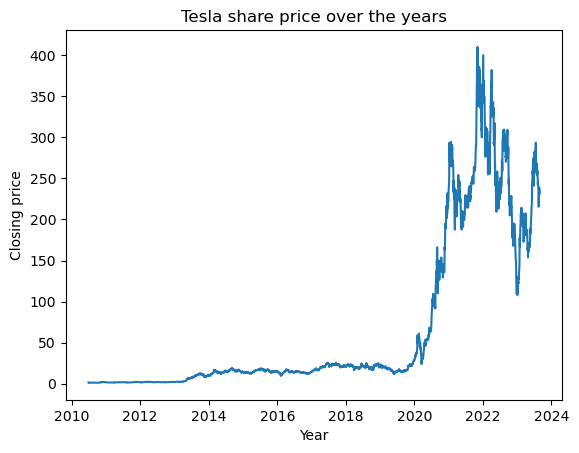

In [11]:
plt.plot(tsla.index,tsla.Close)
plt.xlabel("Year") 
plt.ylabel("Closing price") 
plt.title("Tesla share price over the years") 
plt.show()

In [12]:
#filtering the data
df=tsla['2020':]
print(df.shape)
#create a training data
train_data = df[:int(len(df)*0.8)]
print(train_data.shape)

(919, 5)
(735, 5)


In [13]:
#creating a test data
test_data=df[int(len(df)*0.8):]
print(test_data.shape)

(184, 5)


#### As seen from the graph the data is not stationary

In [14]:
# statsmodels mudel adfuller
from statsmodels.tsa.stattools import adfuller
result=adfuller(train_data['Close'])
result

(-1.9889157736333,
 0.29145419406684114,
 9,
 725,
 {'1%': -3.4394018678958544,
  '5%': -2.865534780932388,
  '10%': -2.5688972751486325},
 5184.829525542103)

In [15]:
# creating a column of closing return
train_data['Close_return']=train_data.Close.diff()
train_data.head()

C:\Users\JASON\AppData\Local\Temp\ipykernel_12728\671279106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Close_return']=train_data.Close.diff()


,Open,High,Low,Close,Volume,Close_return
Date,,,,,,
2020-01-02 00:00:00-05:00,28.299999,28.713333,28.114000,28.684000,142981500,NaN
2020-01-03 00:00:00-05:00,29.366667,30.266666,29.128000,29.534000,266677500,0.850000
2020-01-06 00:00:00-05:00,29.364668,30.104000,29.333332,30.102667,151995000,0.568666
2020-01-07 00:00:00-05:00,30.760000,31.441999,30.224001,31.270666,268231500,1.167999
2020-01-08 00:00:00-05:00,31.580000,33.232666,31.215334,32.809334,467164500,1.538668


<Axes: xlabel='Date'>

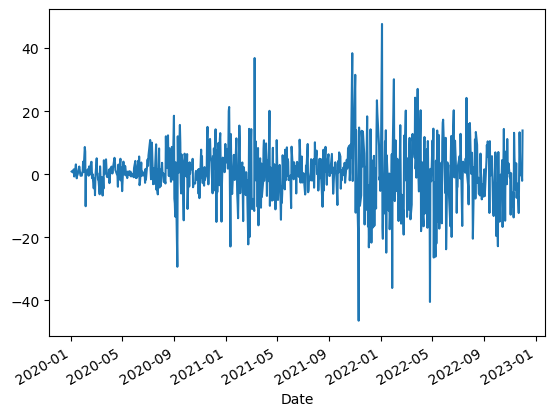

In [16]:
# plotting Close_return column
train_data["Close_return"].plot()

In [17]:
result1=adfuller(train_data['Close_return'].dropna())
result1


(-8.189241568723219,
 7.748076380996961e-13,
 9,
 724,
 {'1%': -3.4394144152232995,
  '5%': -2.8655403100177566,
  '10%': -2.5689002207655443},
 5179.578870182263)

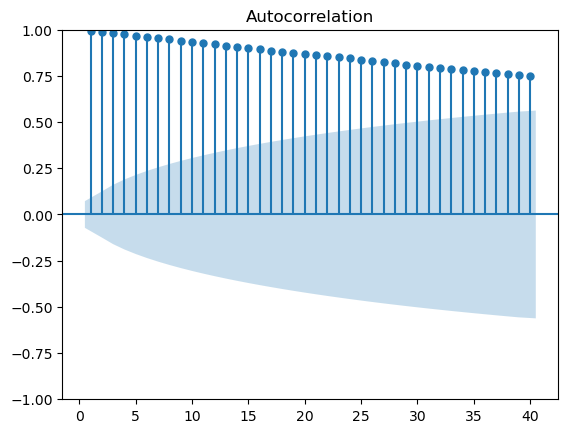

In [18]:
#importing plot_acf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train_data['Close'],lags=40,zero=False,alpha=0.05)
plt.show()

C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


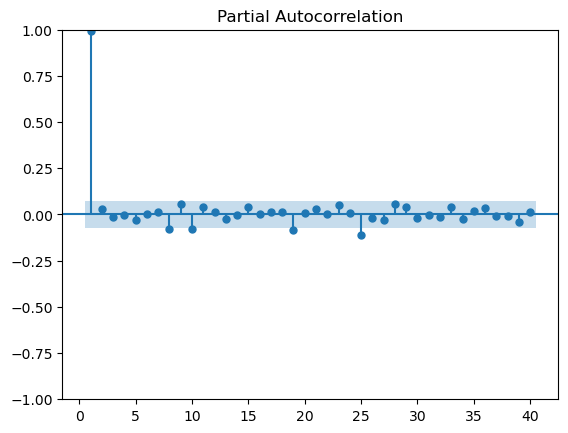

In [19]:
#importing plot_pacf
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train_data['Close'],zero=False,lags=40,alpha=0.05)
plt.show()

In [28]:
from statsmodels.tsa.arima.model import ARIMA
P=[]
Q=[]
aic_arima=[]
llf_arima=[]
for q in [0,1,2,3,4,5]:
    for p in [0,1,2,3,4,5]:
        try:
            model=ARIMA(train_data['Close'],order=(p,1,q))
            result=model.fit()
            print(result)
            P.append(p)
            Q.append(q)
            aic_arima.append(result.aic)
            llf_arima.append(result.llf)
        except:
            P.append(p)
            Q.append(q)
            aic_arima.append(None)
            llf_arima.append(None)

C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\JASON\a

C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\JASON\a

C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\a

C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\JASON\a

C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\a

C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\JASON\a

C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [29]:
arima_df=pd.DataFrame({'p':P,'q':Q,'aic':aic_arima,'log_likelihood':llf_arima})
arima_df.sort_values('log_likelihood',ascending=False)

,p,q,aic,log_likelihood
35,5,5,5302.895333,-2640.447667
34,4,5,5301.843490,-2640.921745
29,5,4,5309.074648,-2644.537324
28,4,4,5308.425682,-2645.212841
27,3,4,5306.527086,-2645.263543
21,3,3,5304.925558,-2645.462779
23,5,3,5309.533835,-2645.766918
16,4,2,5305.617949,-2645.808975
22,4,3,5307.793660,-2645.896830
15,3,2,5305.846539,-2646.923270


In [30]:
arima_df.sort_values('aic',ascending=True)

,p,q,aic,log_likelihood
34,4,5,5301.843490,-2640.921745
35,5,5,5302.895333,-2640.447667
21,3,3,5304.925558,-2645.462779
16,4,2,5305.617949,-2645.808975
15,3,2,5305.846539,-2646.923270
27,3,4,5306.527086,-2645.263543
22,4,3,5307.793660,-2645.896830
28,4,4,5308.425682,-2645.212841
29,5,4,5309.074648,-2644.537324
23,5,3,5309.533835,-2645.766918


According to AIC Score the best model is ARIMA(4,1,5)

prediction

In [32]:
model=ARIMA(train_data['Close'],order=(4,1,5))
result1=model.fit()

C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [177]:
steps=len(test_data)
output= result1.forecast(steps=steps)

C:\Users\JASON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [195]:
output.head()

735    191.055878
736    193.760246
737    194.211108
738    191.696689
739    194.054646
Name: predicted_mean, dtype: float64

In [203]:
fc=pd.Series(data=output)
fc.head()

735    191.055878
736    193.760246
737    194.211108
738    191.696689
739    194.054646
Name: predicted_mean, dtype: float64

In [210]:
forct=pd.DataFrame(fc)
forct.head()


,predicted_mean
735,191.055878
736,193.760246
737,194.211108
738,191.696689
739,194.054646


,Open,High,Low,Close,Volume
Date,,,,,
2022-12-01 00:00:00-05:00,197.080002,198.919998,191.800003,194.699997,80046200
2022-12-02 00:00:00-05:00,191.779999,196.250000,191.110001,194.860001,73645900
2022-12-05 00:00:00-05:00,189.440002,191.270004,180.550003,182.449997,93122700
2022-12-06 00:00:00-05:00,181.220001,183.649994,175.330002,179.820007,92150800
2022-12-07 00:00:00-05:00,175.029999,179.380005,172.220001,174.039993,84213300


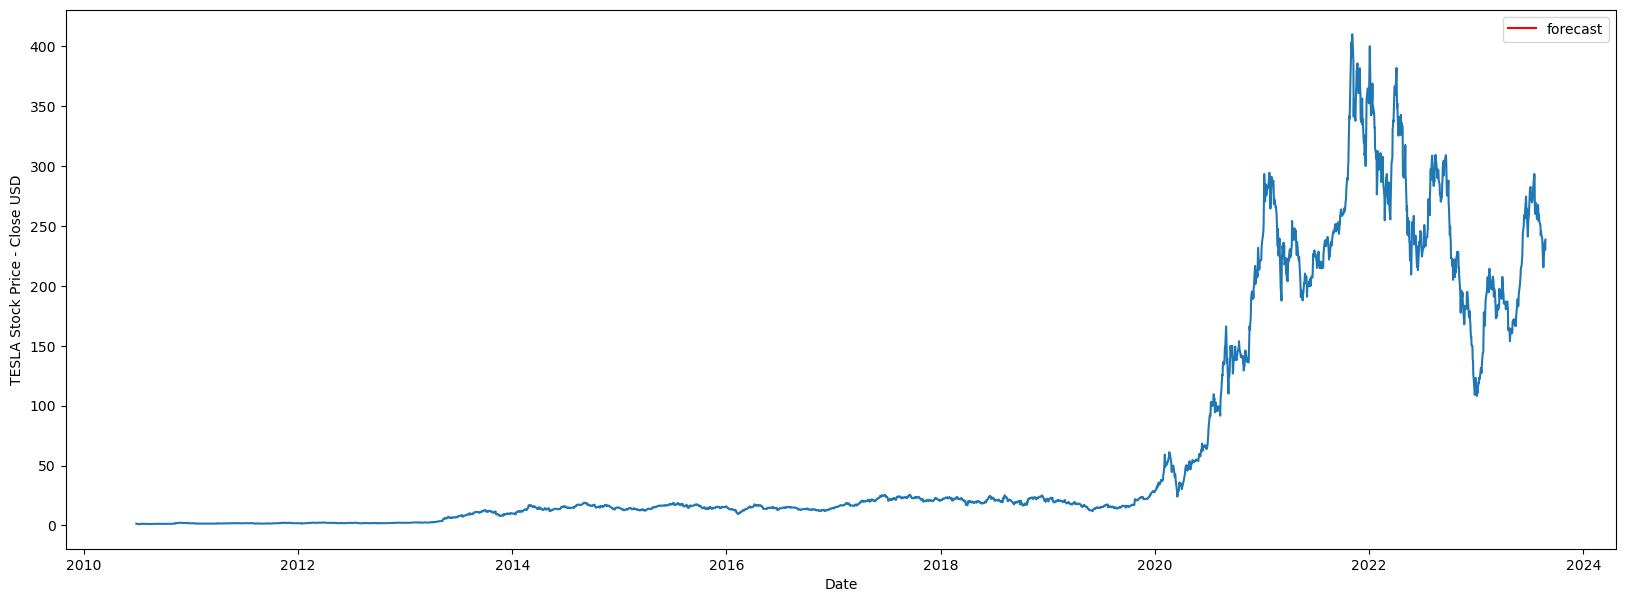

In [147]:
# plot the tsla data
plt.figure(figsize=(20,7))
plt.plot(tsla.index,tsla.Close)

# plot our predictions
plt.plot(fc, color='r', label='forecast')

plt.xlabel('Date')
plt.ylabel('TESLA Stock Price - Close USD')
plt.legend()
plt.show()

735    191.055878
736    193.760246
737    194.211108
738    191.696689
739    194.054646
          ...    
914    193.202423
915    193.202713
916    193.201622
917    193.202445
918    193.202626
Name: predicted_mean, Length: 184, dtype: float64


2022-12-01 00:00:00-05:00   NaN
2022-12-02 00:00:00-05:00   NaN
2022-12-05 00:00:00-05:00   NaN
2022-12-06 00:00:00-05:00   NaN
2022-12-07 00:00:00-05:00   NaN
                             ..
914                         NaN
915                         NaN
916                         NaN
917                         NaN
918                         NaN
Length: 368, dtype: float64